In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"], low_memory=False)

# Remove empty columns
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

# Keep only the recommended data
dataV2 = data[data.REMOVE_case == 'No'].copy()

# Select participants who are part of the cohort data
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# Remove year 2023
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()

# Remove columns with too many missing values
missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# Filter columns that contain 'CONNECTION' in their name
df = dataV2_cohortV3.loc[:, dataV2_cohortV3.columns.str.contains('CONNECTION', case=False)]

# Function to identify binary columns (columns with 'Yes'/'No')
def is_binary_column(column):
    return all(value in ['Yes', 'No'] for value in column.dropna().unique())

# Separate binary and categorical columns
binary_columns = [col for col in df.columns if is_binary_column(df[col])]
categorical_columns = [col for col in df.columns if col not in binary_columns]

# Create DataFrames for binary and categorical columns
df_binary = df[binary_columns]
df_categorical = df[categorical_columns]

#Replace NaN values
df_categorical1 = df_categorical.fillna("Not in the past three months")

# Define the valid categories
valid_categories = [
    "Not in the past three months",
    "Less than monthly",
    "Monthly",
    "A few times a month",
    "Weekly",
    "A few times a week",
    "Daily or almost daily"
]

x = df_categorical1.isin(valid_categories).all(axis=0)
y = x[x].index.tolist()
df_categorical_filtered = df_categorical1[y]
df_categorical_filtered

,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,...,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,CONNECTION_activities_meeting_non_work_p3m,CONNECTION_activities_greeted_neighbour_or_stranger_p3m,CONNECTION_activities_games_p3m,CONNECTION_activities_talked_p3m
19,Weekly,Weekly,Weekly,Less than monthly,A few times a week,Less than monthly,Daily or almost daily,Weekly,Weekly,Less than monthly,...,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a month,Not in the past three months,Daily or almost daily,Not in the past three months,Weekly
21,Weekly,Weekly,Weekly,Less than monthly,Daily or almost daily,Less than monthly,Less than monthly,Weekly,A few times a month,Not in the past three months,...,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a month,Not in the past three months,A few times a week,Less than monthly,Weekly
71,A few times a week,Daily or almost daily,Daily or almost daily,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,A few times a week,Not in the past three months,A few times a week,...,Not in the past three months,Not in the past three months,Not in the past three months,A few times a week,A few times a week,Not in the past three months,Not in the past three months,Daily or almost daily,Not in the past three months,Daily or almost daily
77,Weekly,Weekly,Monthly,A few times a week,A few times a week,Less than monthly,A few times a month,A few times a month,A few times a month,Less than monthly,...,Not in the past three months,Not in the past three months,Not in the past three months,A few times a month,Daily or almost daily,Monthly,Monthly,A few times a week,Weekly,A few times a week
78,A few times a week,A few times a week,Monthly,A few times a week,Weekly,Weekly,Weekly,Weekly,Weekly,Less than monthly,...,Not in the past three months,Not in the past three months,Less than monthly,Daily or almost daily,Daily or almost daily,Monthly,Not in the past three months,Daily or almost daily,Weekly,A few times a week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,Weekly,Weekly,Weekly,Daily or almost daily,A few times a month,Monthly,A few times a week,Less than monthly,Daily or almost daily,A few times a week,...,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Not in the past three months,Daily or almost daily
11380,A few times a week,Weekly,A few times a month,A few times a week,Less than monthly,A few times a month,Weekly,Weekly,A few times a week,A few times a month,...,A few times a week,Not in the past three months,Less than monthly,A few times a month,Not in the past three months,Not in the past three months,Monthly,Daily or almost daily,A few times a month,A few times a week
11412,A few times a week,Daily or almost daily,Monthly,A few times a week,Daily or almost daily,Weekly,A few times a week,Daily or almost daily,Daily or almost daily,Weekly,...,Monthly,Not in the past three months,Monthly,Daily or almost daily,Daily or almost daily,Weekly,A few times a month,A few times a week,Less than monthly,Daily or almost daily
11428,Weekly,Weekly,A few times a week,Weekly,Daily or almost daily,N

In [2]:
# Offline activities
offline_columns = [
    'CONNECTION_activities_talked_day_p3m',
    'CONNECTION_activities_talked_family_p3m',
    'CONNECTION_activities_talked_job_p3m',
    'CONNECTION_activities_talked_hobbies_p3m',
    'CONNECTION_activities_walk_p3m',
    'CONNECTION_activities_coffee_p3m',
    'CONNECTION_activities_board_games_p3m',
    'CONNECTION_activities_visited_friends_p3m',
    'CONNECTION_activities_visited_family_p3m',
    'CONNECTION_activities_community_p3m',
    'CONNECTION_activities_helped_p3m',
    'CONNECTION_activities_discussion_group_p3m',
    'CONNECTION_activities_group_exercise_p3m',
    'CONNECTION_activities_church_p3m',
    'CONNECTION_activities_new_friend_p3m',
    'CONNECTION_activities_hug_p3m',
    'CONNECTION_activities_kissed_p3m',
    'CONNECTION_activities_sex_p3m',
    'CONNECTION_activities_meeting_non_work_p3m',
    'CONNECTION_activities_greeted_neighbour_or_stranger_p3m'
]

# Online activities
online_columns = [
    'CONNECTION_activities_phone_p3m',
    'CONNECTION_activities_letter_or_email_p3m',
    'CONNECTION_activities_meeting_work_p3m',
    'CONNECTION_activities_checked_in_p3m',
    'CONNECTION_activities_text_or_messaged_p3m',
    'CONNECTION_activities_chat_p3m',
    'CONNECTION_activities_video_chat_p3m',
    'CONNECTION_activities_group_video_chat_p3m',
    'CONNECTION_activities_onlinegames_p3m',
    'CONNECTION_activities_games_p3m',
    'CONNECTION_activities_computer_games_p3m'
]


# Separate DataFrames for offline and online connections
df_offline = df_categorical_filtered[offline_columns]
df_online = df_categorical_filtered[online_columns]

# Function to drop columns with a single unique value
def drop_single_value_columns(df):
    # Iterate through columns and drop those with only one unique value
    return df.loc[:, df.nunique() > 1]

# Apply the function to your DataFrame
df_online_filt = drop_single_value_columns(df_online)
df_offline_filt = drop_single_value_columns(df_offline)

for col in df_offline_filt.columns:
    col_summary = df_offline_filt[col].value_counts(dropna=False)
    print(col_summary, "\n")
    
for col in df_online_filt.columns:
    col_summary = df_online_filt[col].value_counts(dropna=False)
    print(col_summary, "\n")

CONNECTION_activities_talked_day_p3m
Daily or almost daily           254
A few times a week              243
Weekly                          135
A few times a month              84
Less than monthly                53
Not in the past three months     43
Monthly                          38
Name: count, dtype: int64 

CONNECTION_activities_talked_family_p3m
A few times a week              201
Weekly                          188
Daily or almost daily           140
A few times a month             129
Less than monthly                76
Monthly                          67
Not in the past three months     49
Name: count, dtype: int64 

CONNECTION_activities_talked_job_p3m
A few times a week              162
Weekly                          148
Daily or almost daily           131
A few times a month             130
Not in the past three months    117
Less than monthly                94
Monthly                          68
Name: count, dtype: int64 

CONNECTION_activities_talked_hobbies_p3m
Weekl

In [3]:
online_variables = df_online_filt.columns.tolist()
offline_variables = df_offline_filt.columns.tolist()

category_mapping = {'Not in the past three months': 0, 'Less than monthly': 1, 'Monthly': 2, 'A few times a month': 3,
                    'Weekly': 4, 'A few times a week': 5, 'Daily or almost daily': 6}

df_online_filt1 = pd.DataFrame()
df_offline_filt1 = pd.DataFrame()
for col in online_variables:
    df_online_filt1[col] = df_online_filt[col].map(category_mapping)

for col in offline_variables:
    df_offline_filt1[col] = df_offline_filt[col].map(category_mapping)

In [4]:
df_happy = pd.DataFrame()
dependent_variables = ['WELLNESS_subjective_happiness_scale_score']

df_happy['Online_Composite'] = df_online_filt1.sum(axis=1)
df_happy['Offline_Composite'] = df_offline_filt1.sum(axis=1)
df_happy[dependent_variables] = dataV2_cohortV3[dependent_variables]

df_happy1 = df_happy.fillna(0)

import statsmodels.api as sm
X = df_happy1[['Online_Composite', 'Offline_Composite']]
y = df_happy1['WELLNESS_subjective_happiness_scale_score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

threshold = 4 / len(df_happy1)
df_hap = df_happy1[cooks_d < threshold]

Q1 = df_hap.quantile(0.25)
Q3 = df_hap.quantile(0.75)
IQR = Q3 - Q1
df_happy2 = df_hap[~((df_hap < (Q1 - 1.5 * IQR)) | (df_hap > (Q3 + 1.5 * IQR))).any(axis=1)]

for col in df_happy2.columns:
    col_summary = df_happy1[col].value_counts(dropna=False)
    print(col_summary, "\n")

Online_Composite
24    39
14    33
23    33
19    32
27    30
21    28
20    27
26    27
29    27
22    26
30    26
34    26
31    26
12    26
17    25
25    25
16    25
15    25
32    21
13    21
28    21
18    21
0     20
11    19
39    19
33    18
9     18
35    17
37    15
36    14
10    13
8     11
40    11
38    10
7      9
6      9
5      8
43     8
44     7
3      5
4      4
1      4
45     3
42     3
2      3
41     2
51     2
47     2
48     1
56     1
54     1
50     1
52     1
58     1
Name: count, dtype: int64 

Offline_Composite
46    26
48    23
39    23
38    22
51    21
      ..
94     1
75     1
82     1
4      1
81     1
Name: count, Length: 83, dtype: int64 

WELLNESS_subjective_happiness_scale_score
5.25    61
4.75    60
4.50    57
5.50    50
4.25    47
0.00    44
4.00    43
5.00    42
6.00    41
5.75    40
6.25    37
3.75    37
3.50    35
3.00    32
3.25    30
7.00    29
6.50    25
2.75    25
2.50    24
6.75    20
2.25    15
2.00    15
1.00    13
1.50    10
1.25  

In [5]:
import statsmodels.formula.api as smf
from patsy import center, scale
model1 = smf.ols(formula='WELLNESS_subjective_happiness_scale_score ~ scale(center(Online_Composite))*scale(center(Offline_Composite))', data=df_happy2).fit()
print(model1.summary())

                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_subjective_happiness_scale_score   R-squared:                       0.186
Model:                                                   OLS   Adj. R-squared:                  0.183
Method:                                        Least Squares   F-statistic:                     59.24
Date:                                       Fri, 29 Nov 2024   Prob (F-statistic):           1.69e-34
Time:                                               04:17:15   Log-Likelihood:                -1301.1
No. Observations:                                        782   AIC:                             2610.
Df Residuals:                                            778   BIC:                             2629.
Df Model:                                                  3                                         
Covariance Type:                                   nonrobust                      

/tmp/ipykernel_580/2816190569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy2['predictions'] = model1.predict(df_happy2)
/tmp/ipykernel_580/2816190569.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy2['Offline_Level'] = pd.qcut(df_happy2['Offline_Composite'], q=3, labels=['Low', 'Medium', 'High'])
/tmp/ipykernel_580/2816190569.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

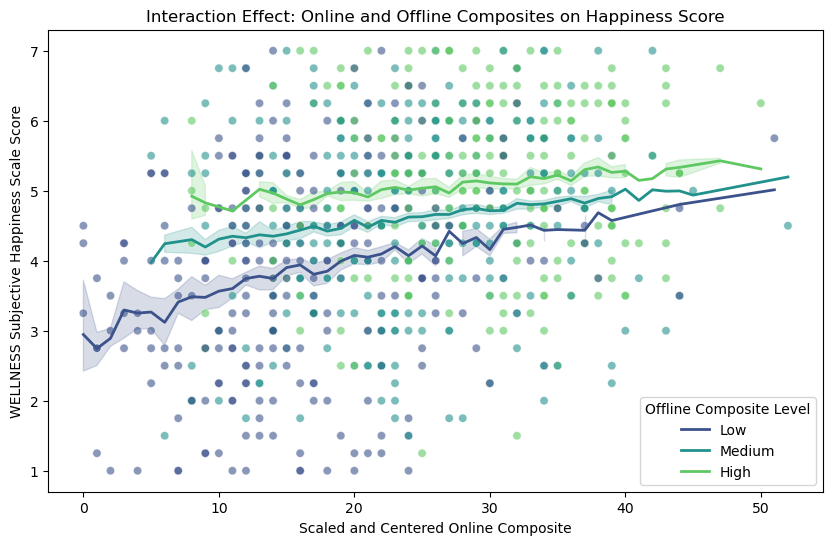

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_happy2['predictions'] = model1.predict(df_happy2)

# Categorize Offline_Composite into levels (low, medium, high)
df_happy2['Offline_Level'] = pd.qcut(df_happy2['Offline_Composite'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare data for lineplot by grouping
lineplot_data = df_happy2.groupby('Offline_Level').apply(
    lambda group: group.sort_values('Online_Composite')
).reset_index(drop=True)

# Define consistent color palette
palette = sns.color_palette("viridis", 3)  # Create a 3-color palette

# Plot interaction effect
plt.figure(figsize=(10, 6))

# Lineplot: Predicted values
sns.lineplot(
    data=lineplot_data,
    x='Online_Composite',
    y='predictions',
    hue='Offline_Level',
    palette=palette,
    linewidth=2
)

# Scatterplot: Observed data
sns.scatterplot(
    data=df_happy2,
    x='Online_Composite',
    y='WELLNESS_subjective_happiness_scale_score',
    hue='Offline_Level',
    palette=palette,
    alpha=0.6,
    legend=False  # Avoid duplicating the legend
)

# Add labels and title
plt.title("Interaction Effect: Online and Offline Composites on Happiness Score")
plt.xlabel("Scaled and Centered Online Composite")
plt.ylabel("WELLNESS Subjective Happiness Scale Score")
plt.legend(title="Offline Composite Level", loc="best")
plt.show()

In [7]:
print("\nInterpretation of Coefficients:")

coefficients = model1.params
p_values = model1.pvalues

online_coeff = coefficients['scale(center(Online_Composite))']
offline_coeff = coefficients['scale(center(Offline_Composite))']
online_p_value = p_values['scale(center(Online_Composite))']
offline_p_value = p_values['scale(center(Offline_Composite))']

print(f"Online Composite Coefficient: {online_coeff:.3f} (p-value: {online_p_value:.3f})")
print(f"Offline Composite Coefficient: {offline_coeff:.3f} (p-value: {offline_p_value:.3f})")

if online_p_value < 0.05:
    if online_coeff > 0:
        print("Online connection has a statistically significant positive impact on wellness.")
    else:
        print("Online connection has a statistically significant negative impact on wellness.")
else:
    print("Online connection does not have a statistically significant effect on wellness.")

if offline_p_value < 0.05:
    if offline_coeff > 0:
        print("Offline connection has a statistically significant positive impact on wellness.")
    else:
        print("Offline connection has a statistically significant negative impact on wellness.")
else:
    print("Offline connection does not have a statistically significant effect on wellness.")

if abs(online_coeff) > abs(offline_coeff):
    print("\nOnline connection appears to have a larger impact on wellness than offline connection.")
else:
    print("\nOffline connection appears to have a larger impact on wellness than online connection.")


Interpretation of Coefficients:
Online Composite Coefficient: 0.197 (p-value: 0.000)
Offline Composite Coefficient: 0.458 (p-value: 0.000)
Online connection has a statistically significant positive impact on wellness.
Offline connection has a statistically significant positive impact on wellness.

Offline connection appears to have a larger impact on wellness than online connection.
